## Preprocessing:

In [106]:
import pandas as pd

df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [107]:
import numpy as np
df.drop_duplicates()
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [108]:
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis = 1)
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   num_lab_procedures        98053 non-null  int64 
 10  num_procedures            98053 non-null  int64 
 11  num_medications           98053 non-null  int64 
 12  number_outpatient         98053 non-null  int64 
 13  number_emergency          98053 non-null  int64 
 14  number_inpatient          

In [109]:
from sklearn.preprocessing import LabelEncoder
df_cleaned['race'].unique()
encoder = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')
# Fit and transform the 'Category' column
df_cleaned['race_encode'] = encoder.fit_transform(df_cleaned['race']) + 1
df_cleaned['gender_encode'] = encoder.fit_transform(df_cleaned['gender'])
df_cleaned['age_encode'] = encoder.fit_transform(df_cleaned['age'])
df_cleaned.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_encode,gender_encode,age_encode
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,3,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,Yes,NO,1,0,2
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,3,1,3
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,3,1,4
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,Yes,>30,3,1,5


In [110]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

encoder = LabelEncoder()

# Apply label encoding to columns 10 to 20
for col in df.columns[18:46]:  # Columns 10 to 20 (0-based index)
    df_cleaned[col + '_encoded'] = encoder.fit_transform(df_cleaned[col]) + 1
df_cleaned.drop(df_cleaned.columns[18:46], axis=1, inplace=True)

df_cleaned.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton_encoded,insulin_encoded,glyburide-metformin_encoded,glipizide-metformin_encoded,glimepiride-pioglitazone_encoded,metformin-rosiglitazone_encoded,metformin-pioglitazone_encoded,change_encoded,diabetesMed_encoded,readmitted_encoded
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,1,4,2,1,1,1,1,1,2,2
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,1,2,2,1,1,1,1,2,2,3
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,1,4,2,1,1,1,1,1,2,3
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,1,3,2,1,1,1,1,1,2,3
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,1,3,2,1,1,1,1,2,2,2


In [111]:
count_textual1 = df_cleaned['diag_1'].str.contains('V', 'E', na=False).sum()
count_textual2 = df_cleaned['diag_2'].str.contains('V', 'E', na=False).sum()
count_textual3 = df_cleaned['diag_3'].str.contains('V', 'E', na=False).sum()
print(count_textual1)
print(count_textual2)
print(count_textual3)

1600
1735
3757


In [112]:
df_cleaned = df_cleaned[~df_cleaned['diag_1'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_1'].str.contains('E' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_2'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_2'].str.contains('E' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_3'].str.contains('V' ,na=False)]
df_cleaned = df_cleaned[~df_cleaned['diag_3'].str.contains('E' ,na=False)]


In [113]:
df_cleaned['diag_1'].unique()

array(['276', '8', '197', '414', '428', '398', '434', '250.7', '157',
       '518', '999', '410', '682', '402', '189', '786', '427', '996',
       '277', '584', '462', '473', '411', '174', '486', '998', '511',
       '432', '626', '295', '196', '250.6', '182', '845', '423', '808',
       '722', '784', '707', '440', '151', '715', '997', '198', '564',
       '403', '38', '590', '578', '250.32', '250.4', '569', '536', '255',
       '599', '558', '574', '491', '560', '244', '250.03', '577', '730',
       '188', '250.8', '332', '562', '291', '296', '510', '401', '263',
       '438', '70', '642', '571', '738', '593', '618', '250.42', '807',
       '456', '446', '572', '575', '250.41', '250.02', '820', '515',
       '780', '250.22', '995', '235', '250.82', '721', '787', '556',
       '162', '724', '282', '250.83', '514', '250.13', '281', '530',
       '466', '435', '250.12', '789', '648', '566', '822', '191', '557',
       '733', '455', '711', '482', '202', '493', '280', '553', '154',
       

In [114]:
# Assuming your DataFrame is called 'df'
df_cleaned['diag_1'] = df_cleaned['diag_1'].astype(float)
df_cleaned['diag_2'] = df_cleaned['diag_2'].astype(float)
df_cleaned['diag_3'] = df_cleaned['diag_3'].astype(float)
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].astype(int)
df_cleaned['discharge_disposition_id'] = df_cleaned['discharge_disposition_id'].astype(int)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].astype(int)

In [115]:
df_cleaned.drop(['race', 'gender', 'age'], axis=1, inplace=True)
df_cleaned.drop(['encounter_id'], axis=1, inplace=True)
df_cleaned.drop(['patient_nbr'], axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89782 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   admission_type_id                 89782 non-null  int64  
 1   discharge_disposition_id          89782 non-null  int64  
 2   admission_source_id               89782 non-null  int64  
 3   time_in_hospital                  89782 non-null  int64  
 4   num_lab_procedures                89782 non-null  int64  
 5   num_procedures                    89782 non-null  int64  
 6   num_medications                   89782 non-null  int64  
 7   number_outpatient                 89782 non-null  int64  
 8   number_emergency                  89782 non-null  int64  
 9   number_inpatient                  89782 non-null  int64  
 10  diag_1                            89782 non-null  float64
 11  diag_2                            89782 non-null  float64
 12  diag_3  

In [116]:
df_cleaned['readmitted_encoded'].unique()

array([2, 3, 1])

In [117]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [118]:
df2 = df_cleaned.drop(['readmitted_encoded'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89782 entries, 1 to 101765
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   admission_type_id                 89782 non-null  int64  
 1   discharge_disposition_id          89782 non-null  int64  
 2   admission_source_id               89782 non-null  int64  
 3   time_in_hospital                  89782 non-null  int64  
 4   num_lab_procedures                89782 non-null  int64  
 5   num_procedures                    89782 non-null  int64  
 6   num_medications                   89782 non-null  int64  
 7   number_outpatient                 89782 non-null  int64  
 8   number_emergency                  89782 non-null  int64  
 9   number_inpatient                  89782 non-null  int64  
 10  diag_1                            89782 non-null  float64
 11  diag_2                            89782 non-null  float64
 12  diag_3  

## PCA:

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [120]:
X_scaled.shape

(89782, 41)

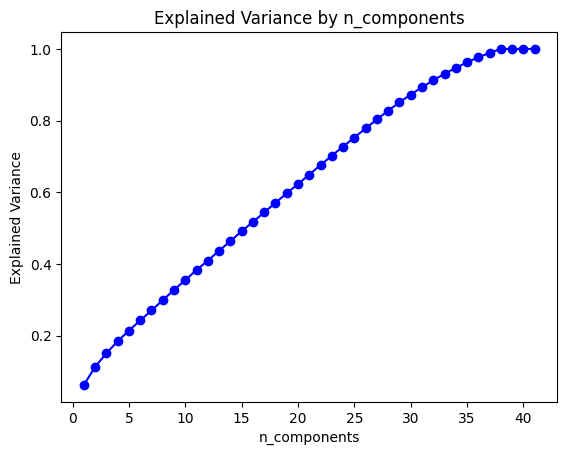

In [122]:
n_components_range = np.arange(1, X_scaled.shape[1] + 1)

explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(X_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'bo-')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by n_components')
plt.show()

In [134]:
pca = PCA(n_components=0.6) 
principal_components = pca.fit_transform(X_scaled)
print(pca.n_components_)

20


In [135]:
df = pd.read_csv('diabetic_data.csv')
target = df['readmitted'] 
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
#df_pca['target'] = target
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.459377,-1.115064,0.849130,1.824412,-1.736591,1.291404,-0.660841,0.521422,0.052218,1.106812,-0.047755,0.921770,-0.132665,0.110767,-0.256614,0.007845,-0.044898,0.140759,-0.254797,-0.095119
1,0.139858,-1.340413,0.345493,1.727842,-1.604557,0.819386,-1.094423,-0.623506,0.720069,2.026434,-0.975208,0.133338,-0.374295,0.179227,0.153351,-0.009053,-0.088859,0.194173,-0.262744,0.103632
2,-0.764651,-2.468035,0.331602,1.051203,-1.443425,1.433038,-2.632399,-0.507327,0.773048,0.217014,-0.038787,-0.231201,-0.047917,-0.056807,0.187736,-0.072935,-0.149632,0.059029,-0.016051,0.137686
3,-0.071180,0.372001,-1.491417,1.799423,-0.439995,-0.986116,-0.186860,-0.551697,0.252233,0.777429,-0.313231,0.186788,-0.571549,-0.214496,0.032252,-0.095214,0.074921,0.171626,-0.031543,0.106350
4,-0.214558,0.215714,0.012950,-1.136274,-1.234392,1.523098,0.978506,-0.941017,1.302006,0.258371,-0.993887,-0.472813,-0.002285,-0.311823,-0.090281,-0.175625,0.055231,0.032282,0.028541,0.099241


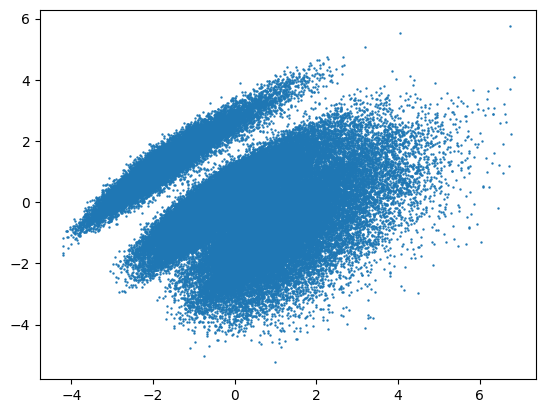

In [136]:
x1 = df_pca['PC1']
x2 = df_pca['PC2']
plt.scatter(x1,x2, s=0.5)

## Unsupervised Learning:

### Silhouette Method:

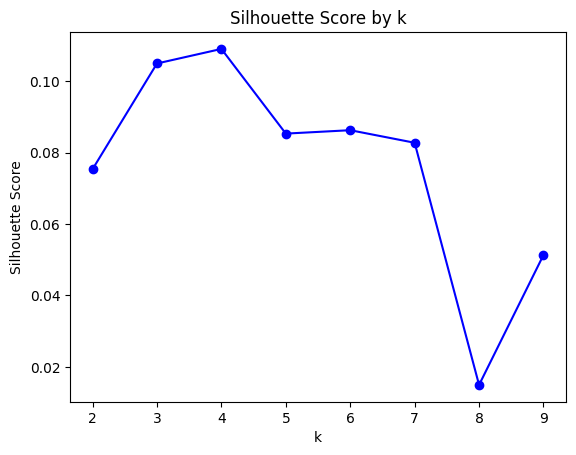

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Assuming df_pca is your dataframe containing the PCA-transformed data

# Define the range of k values
k_values = range(2, 10)  # Change the range as per your requirement

# Initialize an empty list to store the Silhouette Scores
silhouette_scores = []

# Iterate over the k values
for k in k_values:
    # Create a MiniBatchKMeans clustering model with the current k value
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_pca)
    
    # Calculate the Silhouette Score and append it to the list
    silhouette_scores.append(silhouette_score(df_pca, clusters))

# Plotting the Silhouette Scores versus k values
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.show()

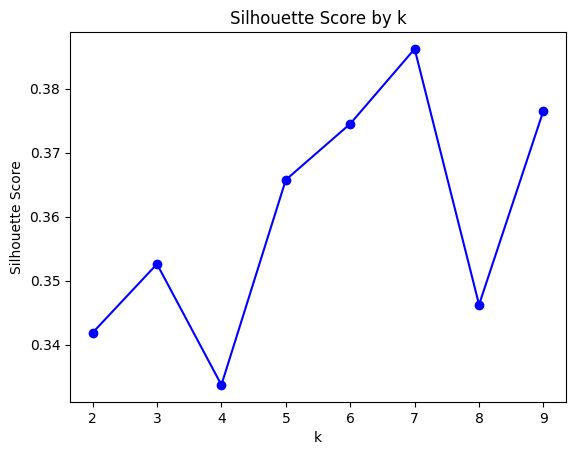

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Assuming df_pca is your dataframe containing the PCA-transformed data

# Define the range of k values
k_values = range(2, 10)  # Change the range as per your requirement

# Initialize an empty list to store the Silhouette Scores
silhouette_scores = []

# Iterate over the k values
for k in k_values:
    # Create a MiniBatchKMeans clustering model with the current k value
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_pca)
    
    # Calculate the Silhouette Score and append it to the list
    silhouette_scores.append(silhouette_score(df_pca, clusters))

# Plotting the Silhouette Scores versus k values
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.show()

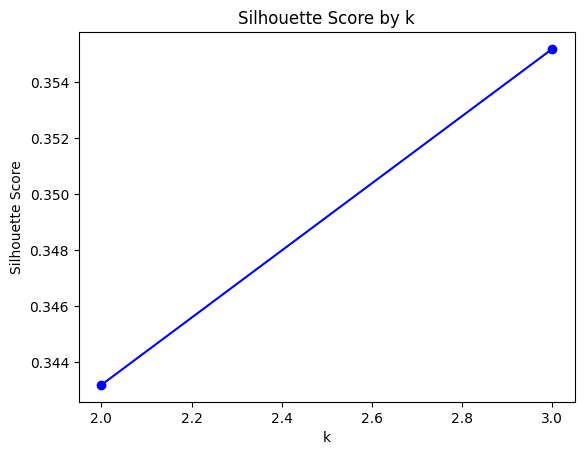

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_pca is your dataframe containing the PCA-transformed data

# Define the range of k values
k_values = range(2, 4)  # Change the range as per your requirement

# Initialize an empty list to store the Silhouette Scores
silhouette_scores = []

# Iterate over the k values
for k in k_values:
    # Create a KMeans clustering model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_pca)
    
    # Calculate the Silhouette Score and append it to the list
    silhouette_scores.append(silhouette_score(df_pca, clusters))

# Plotting the Silhouette Scores versus k values
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.10165411735443983


InvalidIndexError: (slice(None, None, None), 0)

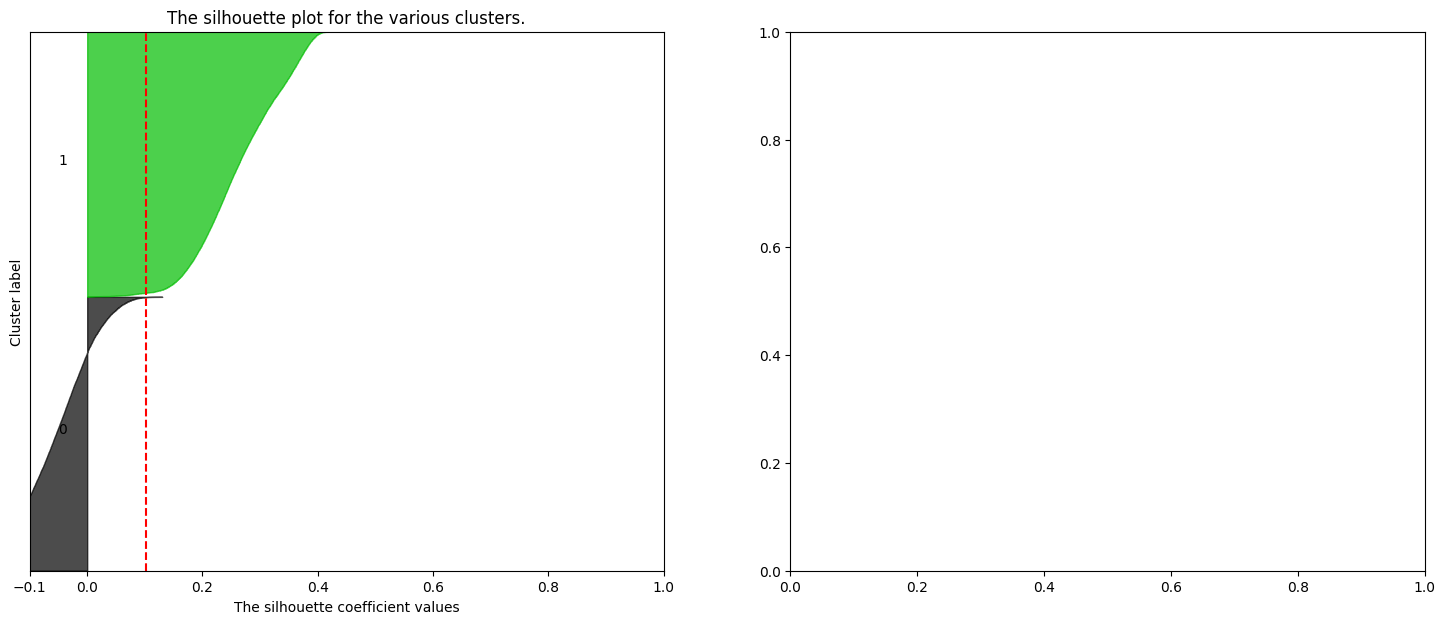

In [88]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
# Assuming you have a DataFrame 'df' with your data
# Replace 'features' with the actual features you're using for clustering

# K-Means
range_n_clusters = [2, 3]
X = df_pca
for n_clusters in range_n_clusters:
     # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Extract relevant columns
result_df = df[['id_encounter']]
result_df['kmean_label'] = best_kmeans.labels_
#result_df['dbscan_label'] = dbscan_labels

# Save to CSV
result_df.to_csv('cluster_results.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
# Assuming you have a DataFrame 'df' with your data
# Replace 'features' with the actual features you're using for clustering

# K-Means
range_n_clusters = [2, 3]
X = df_pca
for n_clusters in range_n_clusters:
     # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


In [ ]:
kmeans = KMeans(init="random", n_clusters=3, n_init=75, random_state=1)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_
print(cluster_labels)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = df_pca['PC1']
y = df_pca['PC2']
# Assuming you have 'x' and 'y' data points and 'cluster_labels'
# Replace with your actual data

# Create a colormap (adjust the number of colors as needed)
num_clusters = len(np.unique(cluster_labels))
colormap = plt.cm.get_cmap('tab10', num_clusters)

# Plot each data point with its corresponding cluster color
for i in range(num_clusters):
    plt.scatter(x[cluster_labels == i], y[cluster_labels == i], color=colormap(i), label=f'Cluster {i}', s= 0.1)

# Customize other plot properties (e.g., labels, title, etc.)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Colored Scatter Plot by K-means Clusters')
plt.legend()

# Show the plot
plt.show()
